# Age from face
Predict age of a person from an image of their face

### Project Repo 
https://github.com/buckcri/age-from-face

## Participants:
Oskar Lachnit, Florian Diedrich, Nils-Christian Buck

### Course and Semester
Deep Learning from Scratch, WiSe2122

### License
Not yet decided

---

In [3]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import pathlib
import matplotlib.pyplot as plt

In [4]:
#NB: Deleted folders for age >93 because there were fee files, but gaps (e.g. no 94 old persons)
#Afterwards class label is equal to index in prediction array
data_dir = "../data/face_age"

In [5]:
data_dir = pathlib.Path(data_dir)

In [6]:
batch_size = 32

#Fix seed to achieve determinism
fixed_seed = 42

#10% of data reserved for validation set
validation_split=0.1

#Load both training and validation set. Sets are shuffled by default
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=validation_split,
  subset="training",
  seed=fixed_seed,
  image_size=(100, 100),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=validation_split,
  subset="validation",
  seed=fixed_seed,
  image_size=(100, 100),
  batch_size=batch_size)


Found 9752 files belonging to 93 classes.
Using 8777 files for training.


2021-12-28 13:21:18.563708: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-28 13:21:18.563728: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-28 13:21:18.563750: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (39051fad144a): /proc/driver/nvidia/version does not exist
2021-12-28 13:21:18.566358: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 9752 files belonging to 93 classes.
Using 975 files for validation.


2021-12-28 13:21:55.954175: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


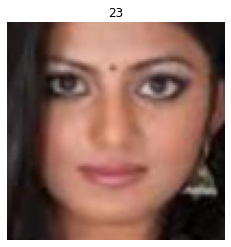

In [7]:
#Show one random image from dataset, including label

example_batch = train_ds.take(1)

#x and y are one batch array of examples and labels
x,y = iter(example_batch).get_next()

example_image = x[0]
example_label = y[0]

plt.imshow(example_image.numpy().astype("uint8"))
plt.title(example_label.numpy())
plt.axis("off")
plt.show()

In [8]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break


(32, 100, 100, 3)
(32,)


In [9]:
#Count the number of examples for each label
from collections import defaultdict

age_dist = defaultdict(int)

for x_batch,y_batch in train_ds.as_numpy_iterator():
   for i in range(len(y_batch)):
       age_dist[y_batch[i]] += 1


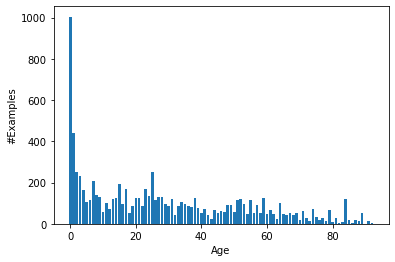

In [10]:
#Plot above count
plt.bar(list(age_dist.keys()), age_dist.values())
plt.xlabel('Age')
plt.ylabel('#Examples')
plt.show()

In [11]:
#Number of distinct labels:
num_labels = len(list(age_dist.keys()))

print(num_labels)

93


In [10]:
# Define DNN with hidden layers. Rescale pixel values to [0, 1] first.
# There's one output class for each label.
# @see https://www.tensorflow.org/api_docs/python/tf/keras/layers

num_classes = num_labels

#Do not define activation function on output layer as recommended by TF documentation.
#Activation from using from_logits=True in loss function may offer better numerical stability.
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

#SparseCategoricalCrossentropy is to be used with integer labels (versus one-hot representation)
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy()])

In [11]:
#Train model

epochs = 50

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

print(model.summary())

Epoch 1/50
275/275 [==============================] - 7s 26ms/step - loss: 4.3469 - accuracy: 0.1088 - top_k_categorical_accuracy: 0.7267 - val_loss: 3.9470 - val_accuracy: 0.1087 - val_top_k_categorical_accuracy: 0.8390
Epoch 2/50
275/275 [==============================] - 7s 26ms/step - loss: 3.7344 - accuracy: 0.1327 - top_k_categorical_accuracy: 0.4278 - val_loss: 3.6675 - val_accuracy: 0.1374 - val_top_k_categorical_accuracy: 0.3969
Epoch 3/50
275/275 [==============================] - 7s 26ms/step - loss: 3.5980 - accuracy: 0.1440 - top_k_categorical_accuracy: 0.3231 - val_loss: 3.6750 - val_accuracy: 0.1272 - val_top_k_categorical_accuracy: 0.2267
Epoch 4/50
275/275 [==============================] - 7s 26ms/step - loss: 3.5103 - accuracy: 0.1462 - top_k_categorical_accuracy: 0.2789 - val_loss: 3.7100 - val_accuracy: 0.1405 - val_top_k_categorical_accuracy: 0.4431
Epoch 5/50
275/275 [==============================] - 7s 26ms/step - loss: 3.4392 - accuracy: 0.1555 - top_k_categor

Epoch 38/50
275/275 [==============================] - 8s 29ms/step - loss: 2.6737 - accuracy: 0.2569 - top_k_categorical_accuracy: 0.2202 - val_loss: 3.6535 - val_accuracy: 0.1528 - val_top_k_categorical_accuracy: 0.2010
Epoch 39/50
275/275 [==============================] - 7s 25ms/step - loss: 2.7020 - accuracy: 0.2521 - top_k_categorical_accuracy: 0.2222 - val_loss: 3.6489 - val_accuracy: 0.1426 - val_top_k_categorical_accuracy: 0.1897
Epoch 40/50
275/275 [==============================] - 7s 25ms/step - loss: 2.6628 - accuracy: 0.2566 - top_k_categorical_accuracy: 0.2217 - val_loss: 3.7127 - val_accuracy: 0.1610 - val_top_k_categorical_accuracy: 0.2277
Epoch 41/50
275/275 [==============================] - 7s 25ms/step - loss: 2.6454 - accuracy: 0.2545 - top_k_categorical_accuracy: 0.2224 - val_loss: 3.7334 - val_accuracy: 0.1467 - val_top_k_categorical_accuracy: 0.1815
Epoch 42/50
275/275 [==============================] - 7s 25ms/step - loss: 2.6114 - accuracy: 0.2654 - top_k_ca

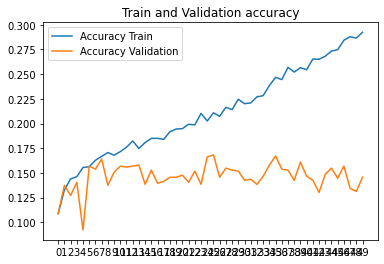

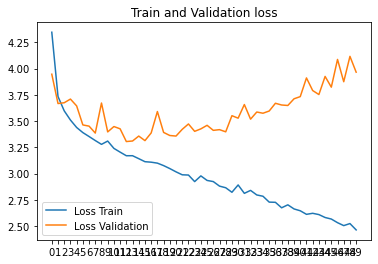

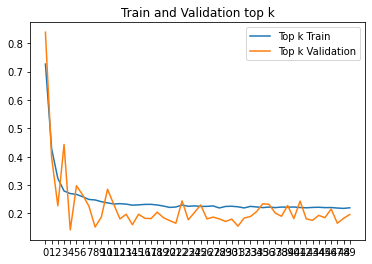

In [12]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

num_epochs = range(len(accuracy))

plt.plot(num_epochs, accuracy, label='Accuracy Train')
plt.plot(num_epochs, val_accuracy, label='Accuracy Validation')
plt.legend(loc=0)
plt.xticks(num_epochs)
plt.title('Train and Validation accuracy')
plt.show()


loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(num_epochs, loss, label='Loss Train')
plt.plot(num_epochs, val_loss, label='Loss Validation')
plt.legend(loc=0)
plt.xticks(num_epochs)
plt.title('Train and Validation loss')
plt.show()

In [27]:
def mean_avg_top_k(predictions, k=5):
    """Returns the average of the top k (default: k=5) best predictions' index (index equals age in our case)    
    """
    pred_index_list=sorted(((value, key) for (key,value) in enumerate(predictions[0])), reverse=True)
    sorted_index_pred_list=list([(key,value) for value,key in pred_index_list])

    avg = 0
    for i in range(k):
        key, value = sorted_index_pred_list[i]
        avg+=key
    avg/=k
    
    return avg

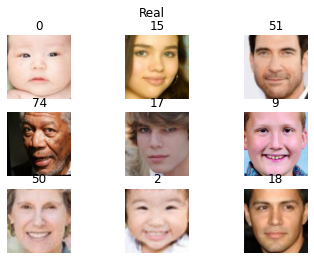

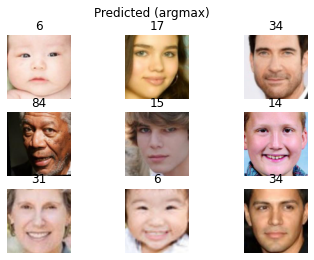

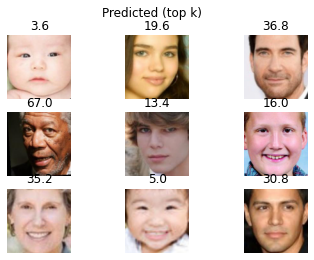

In [39]:
#Show one random image from dataset, including label

example_batch = val_ds.take(1)

#x and y are one batch array of examples and labels
x,y = iter(example_batch).get_next()

for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(x[i].numpy().astype("uint8"))
    plt.title(y[i].numpy())
    plt.axis("off")
    plt.suptitle("Real")
    
plt.show()    
    
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(x[i].numpy().astype("uint8"))
    predictions = model.predict(np.expand_dims(x[i], axis=0))
    best_prediction = np.argmax(predictions)
    #No need to map prediction index to label, because they are identical in our case
    plt.title(best_prediction)
    plt.axis("off")
    plt.suptitle("Predicted (argmax)")
    
plt.show()

for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(x[i].numpy().astype("uint8"))
    predictions = model.predict(np.expand_dims(x[i], axis=0))
    avg = mean_avg_top_k(predictions)
    plt.title(avg)
    plt.axis("off")
    plt.suptitle("Predicted (top k)")
    
plt.show()

In [15]:
print("Predictions for last example:")
print(predictions)

Predictions for last example:
[[  3.7938416   4.382383    3.4970827   3.2587764   1.3197793   1.3218459
    2.2434912   2.10456     1.9518582   1.5388279  -0.9772546  -0.9227094
   -1.1355958  -3.692246   -8.29675    -4.715722   -7.1592975  -1.2665894
  -16.200932   -6.8156343  -7.7817197  -4.976547   -5.782771   -6.2360654
  -11.590503   -3.9037504  -3.4915912  -8.931638   -9.20989    -9.288709
   -4.9418526  -6.335752  -12.528068   -9.568756   -9.0858755  -9.12083
  -11.727708  -10.021021  -10.093992  -13.419143  -10.00381    -9.462563
  -14.9817095 -11.440851  -10.766357  -19.81522    -5.2501335 -11.968283
  -11.51291    -9.492559   -9.114737   -5.384288  -13.269772  -12.497569
  -15.588277  -11.014358   -9.135525  -11.60579   -11.595853   -4.418553
   -9.578358  -16.017456  -19.178288  -10.207537   -8.204832   -3.5968628
  -15.475222   -8.062815  -18.798536   -4.4068584 -10.089995  -14.36674
   -4.9192863 -24.425398   -8.51977   -15.292404  -25.299982  -20.289701
  -22.309074   -5.

Papers:

* S. N. Kohail:  
Using Artificial Neural Network for Human Age Estimation Based on Facial Images  
2012 International Conference on Innovations in Information Technology (IIT)  
https://www.inf.uni-hamburg.de/en/inst/ab/lt/people/alumni/sarah-kohail/kohail-age-estimation.pdf

* Z. Qawaqneh, A. Abu Mallouh & B. D. Barkana:  
Deep Convolutional Neural Network for Age Estimation based on VGG-Face Model  
https://arxiv.org/ftp/arxiv/papers/1709/1709.01664.pdf

* N. Hewahi, A. Olwan, N. Tubeel, S. El-Asar, Z. Abu-Sultan:  
Age Estimation based on Neural Networks using Face Features  
Journal of Emerging Trends in Computing and Information Sciences 1:2, October 2010  
https://www.researchgate.net/publication/47277288_Age_Estimation_based_on_Neural_Networks_using_Face_Features

* R. Rahadian & S. Suyanto:  
Deep Residual Neural Network for Age Classification with Face Image  
2019 International Seminar on Research of Information Technology and Intelligent Systems (ISRITI)  
https://ieeexplore.ieee.org/document/9034664

* M. M. Islam & J.-H. Baek:  
Deep Learning Based Real Age and Gender Estimation from Unconstrained Face Image towards Smart Store Customer Relationship Management  
Applied Sciences 2021, 11  
https://www.mdpi.com/2076-3417/11/10/4549/pdf

* A. Othmania, A. R. Taleb, H. Abdelkawy & A. Hadid:  
Age estimation from faces using deep learning: A comparative analysis  
Computer Vision and Image Understanding 196, July 2020  
https://www.sciencedirect.com/science/article/abs/pii/S1077314220300424

Additional links:

* https://towardsdatascience.com/age-detection-using-facial-images-traditional-machine-learning-vs-deep-learning-2437b2feeab2

In [41]:
# Define DNN with hidden layers. Rescale pixel values to [0, 1] first.
# There's one output class for each label.
# @see https://www.tensorflow.org/api_docs/python/tf/keras/layers

num_classes = num_labels

dropout_rate = 0.25

#Do not define activation function on output layer as recommended by TF documentation.
#Activation from using from_logits=True in loss function may offer better numerical stability.
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(dropout_rate),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(dropout_rate),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(num_classes)
])

#SparseCategoricalCrossentropy is to be used with integer labels (versus one-hot representation)
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy()])

In [42]:
#Train model

epochs = 60

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

print(model.summary())

Epoch 1/80
275/275 [==============================] - 14s 50ms/step - loss: 4.1279 - accuracy: 0.1163 - top_k_categorical_accuracy: 0.3627 - val_loss: 4.0277 - val_accuracy: 0.0810 - val_top_k_categorical_accuracy: 0.3497
Epoch 2/80
275/275 [==============================] - 14s 49ms/step - loss: 3.6413 - accuracy: 0.1433 - top_k_categorical_accuracy: 0.3074 - val_loss: 3.7315 - val_accuracy: 0.1344 - val_top_k_categorical_accuracy: 0.2287
Epoch 3/80
275/275 [==============================] - 14s 49ms/step - loss: 3.5324 - accuracy: 0.1478 - top_k_categorical_accuracy: 0.2991 - val_loss: 4.0946 - val_accuracy: 0.1200 - val_top_k_categorical_accuracy: 0.3169
Epoch 4/80
275/275 [==============================] - 14s 49ms/step - loss: 3.4546 - accuracy: 0.1504 - top_k_categorical_accuracy: 0.2863 - val_loss: 4.1723 - val_accuracy: 0.0544 - val_top_k_categorical_accuracy: 0.0646
Epoch 5/80
275/275 [==============================] - 14s 49ms/step - loss: 3.4086 - accuracy: 0.1591 - top_k_ca

Epoch 38/80
275/275 [==============================] - 14s 49ms/step - loss: 3.3137 - accuracy: 0.1577 - top_k_categorical_accuracy: 0.3259 - val_loss: 3.4253 - val_accuracy: 0.1631 - val_top_k_categorical_accuracy: 0.2974
Epoch 39/80
275/275 [==============================] - 14s 50ms/step - loss: 3.3117 - accuracy: 0.1594 - top_k_categorical_accuracy: 0.3172 - val_loss: 3.7171 - val_accuracy: 0.1364 - val_top_k_categorical_accuracy: 0.1323
Epoch 40/80
275/275 [==============================] - 14s 49ms/step - loss: 3.2807 - accuracy: 0.1645 - top_k_categorical_accuracy: 0.3083 - val_loss: 3.4401 - val_accuracy: 0.1610 - val_top_k_categorical_accuracy: 0.2185
Epoch 41/80
275/275 [==============================] - 14s 49ms/step - loss: 3.2694 - accuracy: 0.1620 - top_k_categorical_accuracy: 0.3117 - val_loss: 3.4989 - val_accuracy: 0.1621 - val_top_k_categorical_accuracy: 0.3303
Epoch 42/80
275/275 [==============================] - 14s 49ms/step - loss: 3.2710 - accuracy: 0.1641 - top

Epoch 75/80
275/275 [==============================] - 14s 49ms/step - loss: 3.4896 - accuracy: 0.1453 - top_k_categorical_accuracy: 0.4528 - val_loss: 4.4406 - val_accuracy: 0.1251 - val_top_k_categorical_accuracy: 0.7559
Epoch 76/80
275/275 [==============================] - 14s 49ms/step - loss: 3.8181 - accuracy: 0.1284 - top_k_categorical_accuracy: 0.5693 - val_loss: 4.1669 - val_accuracy: 0.1200 - val_top_k_categorical_accuracy: 0.5405
Epoch 77/80
275/275 [==============================] - 14s 49ms/step - loss: 3.7809 - accuracy: 0.1309 - top_k_categorical_accuracy: 0.5555 - val_loss: 4.2246 - val_accuracy: 0.1251 - val_top_k_categorical_accuracy: 0.1938
Epoch 78/80
275/275 [==============================] - 14s 49ms/step - loss: 3.7704 - accuracy: 0.1307 - top_k_categorical_accuracy: 0.5476 - val_loss: 4.1612 - val_accuracy: 0.1138 - val_top_k_categorical_accuracy: 0.7703
Epoch 79/80
275/275 [==============================] - 14s 50ms/step - loss: 3.7691 - accuracy: 0.1311 - top

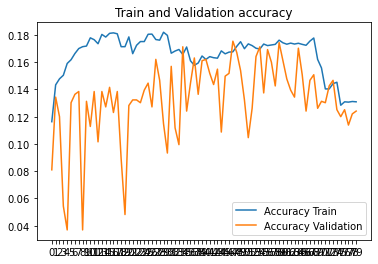

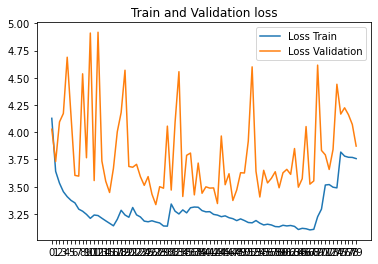

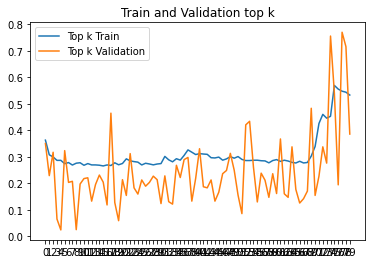

In [43]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

num_epochs = range(len(accuracy))

plt.plot(num_epochs, accuracy, label='Accuracy Train')
plt.plot(num_epochs, val_accuracy, label='Accuracy Validation')
plt.legend(loc=0)
plt.xticks(num_epochs)
plt.title('Train and Validation accuracy')
plt.show()


loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(num_epochs, loss, label='Loss Train')
plt.plot(num_epochs, val_loss, label='Loss Validation')
plt.legend(loc=0)
plt.xticks(num_epochs)
plt.title('Train and Validation loss')
plt.show()

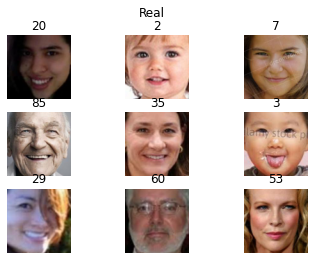

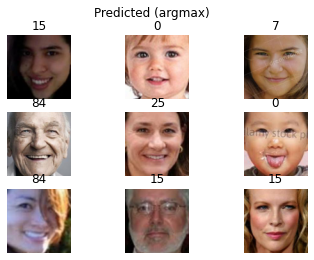

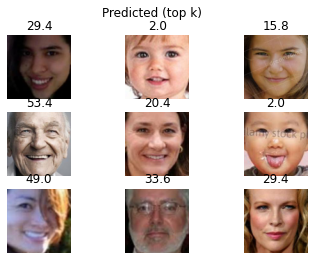

In [44]:
#Show one random image from dataset, including label

example_batch = val_ds.take(1)

#x and y are one batch array of examples and labels
x,y = iter(example_batch).get_next()

for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(x[i].numpy().astype("uint8"))
    plt.title(y[i].numpy())
    plt.axis("off")
    plt.suptitle("Real")
    
plt.show()    
    
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(x[i].numpy().astype("uint8"))
    predictions = model.predict(np.expand_dims(x[i], axis=0))
    best_prediction = np.argmax(predictions)
    #No need to map prediction index to label, because they are identical in our case
    plt.title(best_prediction)
    plt.axis("off")
    plt.suptitle("Predicted (argmax)")
    
plt.show()

for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(x[i].numpy().astype("uint8"))
    predictions = model.predict(np.expand_dims(x[i], axis=0))
    avg = mean_avg_top_k(predictions)
    plt.title(avg)
    plt.axis("off")
    plt.suptitle("Predicted (top k)")
    
plt.show()

In [108]:
#Number of years to group together
age_grouping = 10

def label_group_mapping(x, y):
    return x, y//age_grouping

train_ds_grouped = train_ds.map(label_group_mapping)
val_ds_grouped = val_ds.map(label_group_mapping)

In [109]:
# Define DNN with hidden layers. Rescale pixel values to [0, 1] first.

num_classes = num_labels//age_grouping
if ((num_labels % age_grouping) != 0):
    num_classes+=1

print(f"Grouped {num_labels} labels to {num_classes} classes with stride {age_grouping}.")

dropout_rate = 0.1

#Do not define activation function on output layer as recommended by TF documentation.
#Activation from using from_logits=True in loss function may offer better numerical stability.
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(dropout_rate),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(dropout_rate),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(num_classes)
])

#SparseCategoricalCrossentropy is to be used with integer labels (versus one-hot representation)
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy()])

Grouped 93 labels to 10 classes with stride 10.


In [110]:
#Train model

epochs = 30

history = model.fit(
  train_ds_grouped,
  validation_data=val_ds_grouped,
  epochs=epochs
)

print(model.summary())

Epoch 1/30
275/275 [==============================] - 14s 49ms/step - loss: 1.7333 - accuracy: 0.4062 - top_k_categorical_accuracy: 0.5586 - val_loss: 1.5351 - val_accuracy: 0.4451 - val_top_k_categorical_accuracy: 0.5467
Epoch 2/30
275/275 [==============================] - 13s 49ms/step - loss: 1.4405 - accuracy: 0.4688 - top_k_categorical_accuracy: 0.5811 - val_loss: 1.5742 - val_accuracy: 0.4369 - val_top_k_categorical_accuracy: 0.6862
Epoch 3/30
275/275 [==============================] - 13s 49ms/step - loss: 1.3668 - accuracy: 0.4946 - top_k_categorical_accuracy: 0.5757 - val_loss: 1.8285 - val_accuracy: 0.3713 - val_top_k_categorical_accuracy: 0.7405
Epoch 4/30
275/275 [==============================] - 13s 49ms/step - loss: 1.3118 - accuracy: 0.5055 - top_k_categorical_accuracy: 0.5620 - val_loss: 2.2468 - val_accuracy: 0.3559 - val_top_k_categorical_accuracy: 0.9477
Epoch 5/30
275/275 [==============================] - 13s 49ms/step - loss: 1.2939 - accuracy: 0.5141 - top_k_ca

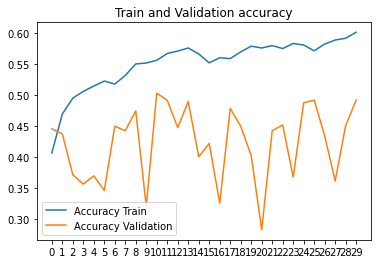

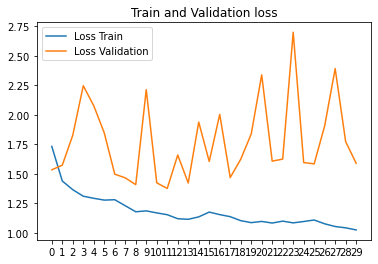

In [111]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

num_epochs = range(len(accuracy))

plt.plot(num_epochs, accuracy, label='Accuracy Train')
plt.plot(num_epochs, val_accuracy, label='Accuracy Validation')
plt.legend(loc=0)
plt.xticks(num_epochs)
plt.title('Train and Validation accuracy')
plt.show()


loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(num_epochs, loss, label='Loss Train')
plt.plot(num_epochs, val_loss, label='Loss Validation')
plt.legend(loc=0)
plt.xticks(num_epochs)
plt.title('Train and Validation loss')
plt.show()

In [112]:
def to_grouped_age_range(age_class):
    lower_bound = age_class*age_grouping
    upper_bound = ((age_class+1)*age_grouping)-1
    return "{} ({}-{})".format(age_class, lower_bound, upper_bound)

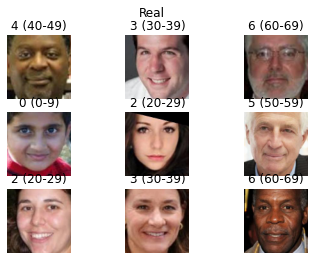

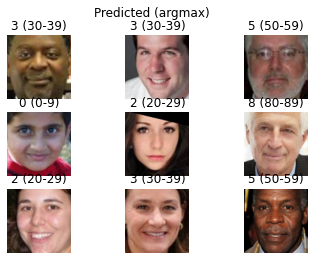

In [113]:
#Show one random image from dataset, including label

example_batch = val_ds_grouped.take(1)

#x and y are one batch array of examples and labels
x,y = iter(example_batch).get_next()

for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(x[i].numpy().astype("uint8"))
    plt.title(to_grouped_age_range(y[i].numpy()))
    #plt.title(y[i].numpy())
    plt.axis("off")
    plt.suptitle("Real")
    
plt.show()    
    
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(x[i].numpy().astype("uint8"))
    predictions = model.predict(np.expand_dims(x[i], axis=0))
    best_prediction = np.argmax(predictions)
    plt.title(to_grouped_age_range(best_prediction))
    #lt.title(best_prediction)
    plt.axis("off")
    plt.suptitle("Predicted (argmax)")
    
plt.show()

In [114]:
print("Predictions for last example:")
print(predictions)
print(best_prediction)

Predictions for last example:
[[-4.24266    -1.4162202  -0.01966681  1.5334816   1.4483354   2.0134723
   0.86805093 -0.21846887  0.82498515 -6.214693  ]]
5
